<a href="https://colab.research.google.com/github/esferita006/Probabilidad/blob/main/Ejercicios_de_procesos_estocasticos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE PROCESOS ESTOCASTICOS</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de procesos estocasticos </i></h5>
</font>

In [2]:
pip install numpy matplotlib


<font color="Black" face="Comic Sans MS,arial">
  <h5 ><i>
  1. Elabora un programa en que simule un movimiento Browniano estandar a tiempo t. Genera 100 trayectorias y mu ́estrales en la misma grafica considerando t = 30.
</i></h5>
</font>





<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center"><i>Modelo teórico (recordatorio breve)</i></h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <p align="justify">
    Un movimiento browniano estándar $\{B(t)\}_{t\ge 0}$ cumple las siguientes propiedades:
  </p>

  <p align="justify">
    $B(0) = 0$
  </p>

  <p align="justify">
    Incrementos independientes:
  </p>

  <p align="center">
    $B(t + \Delta t) - B(t) \sim \mathcal{N}(0, \Delta t)$
  </p>

  <p align="justify">
    Valor esperado y varianza:
  </p>

  <p align="center">
    $E[B(t)] = 0 \qquad \text{y} \qquad \mathrm{Var}(B(t)) = t$
  </p>

  <p align="justify">
    En simulación discreta:
  </p>

  <p align="center">
    $B_{k+1} = B_k + \sqrt{\Delta t}\, Z_k,
    \qquad Z_k \sim \mathcal{N}(0,1)$
  </p>
</font>


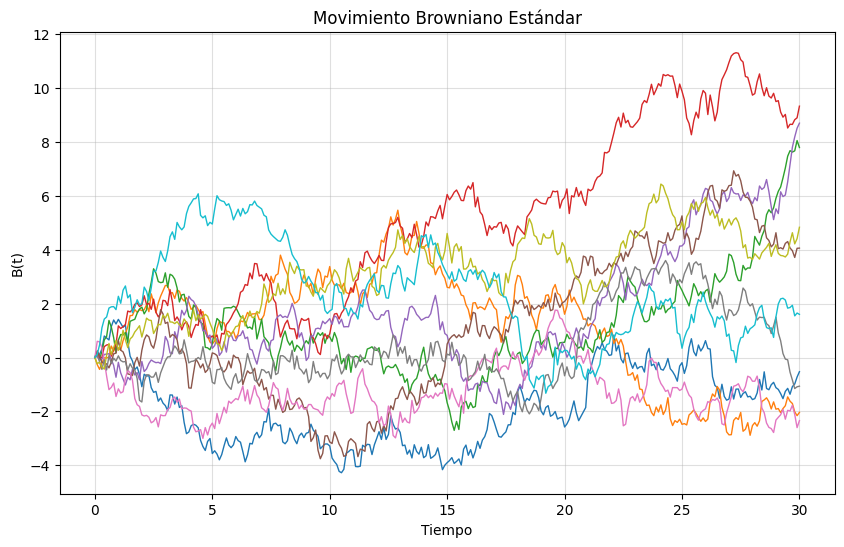

Verificación empírica en t = T
Media estimada:    -0.0337  (teórica: 0)
Varianza estimada: 24.4710  (teórica: 30.00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Movimiento Browniano Estándar (Simulación)
# =============================================================================
# B(0) = 0
# Incrementos ~ N(0, dt)
# Var(B(t)) = t
# =============================================================================


def movimiento_browniano(num_trayectorias: int, T: float, dt: float = 0.1, seed: int | None = None):
    """
    Simula trayectorias de un movimiento browniano estándar.

    Parameters
    ----------
    num_trayectorias : int
        Número de trayectorias a simular.
    T : float
        Tiempo total de simulación.
    dt : float, optional
        Tamaño del paso temporal (dt > 0).
    seed : int or None, optional
        Semilla para reproducibilidad.

    Returns
    -------
    t : np.ndarray
        Vector de tiempos.
    trayectorias : np.ndarray
        Matriz de tamaño (num_trayectorias, len(t)),
        cada fila es una trayectoria.
    """
    if num_trayectorias <= 0:
        raise ValueError("num_trayectorias debe ser positivo")
    if T <= 0 or dt <= 0:
        raise ValueError("T y dt deben ser positivos")

    if seed is not None:
        np.random.seed(seed)

    num_pasos = int(T / dt)
    t = np.linspace(0, T, num_pasos + 1)

    # Incrementos normales
    incrementos = np.sqrt(dt) * np.random.normal(
        size=(num_trayectorias, num_pasos)
    )

    # B(0)=0 y acumulación
    trayectorias = np.column_stack((
        np.zeros(num_trayectorias),
        np.cumsum(incrementos, axis=1)
    ))

    return t, trayectorias


def graficar_trayectorias(t, trayectorias, max_trayectorias: int = 10):
    """
    Grafica trayectorias del movimiento browniano.

    Parameters
    ----------
    t : np.ndarray
        Vector de tiempos.
    trayectorias : np.ndarray
        Matriz de trayectorias.
    max_trayectorias : int
        Número máximo de trayectorias a graficar (por claridad).
    """
    plt.figure(figsize=(10, 6))

    n_plot = min(trayectorias.shape[0], max_trayectorias)

    for i in range(n_plot):
        plt.plot(t, trayectorias[i, :], lw=1)

    plt.title("Movimiento Browniano Estándar")
    plt.xlabel("Tiempo")
    plt.ylabel("B(t)")
    plt.grid(alpha=0.4)
    plt.show()


def verificar_propiedades(t, trayectorias):
    """
    Verifica empíricamente E[B(t)] y Var(B(t)) en el tiempo final.
    """
    B_T = trayectorias[:, -1]

    print("Verificación empírica en t = T")
    print(f"Media estimada:    {np.mean(B_T):.4f}  (teórica: 0)")
    print(f"Varianza estimada: {np.var(B_T):.4f}  (teórica: {t[-1]:.2f})")


if __name__ == "__main__":
    # Parámetros
    num_trayectorias = 100
    T = 30
    dt = 0.1

    # Simulación
    t, trayectorias = movimiento_browniano(
        num_trayectorias,
        T,
        dt=dt,
        seed=42
    )

    # Gráfica
    graficar_trayectorias(t, trayectorias, max_trayectorias=10)

    # Verificación
    verificar_propiedades(t, trayectorias)


<font color="Black" face="Comic Sans MS,arial">
  <h5 ><i>2. Escribe un programa que simule un proceso de Poisson de parametro λ. El programa debe tener como parametros el parametro λ y el tiempo t hasta el cual se contaron los eventos.

Usa tu programa para responder lo siguiente.

(a) Genera una trayectoria del PP Nt con λ = 0.5 en el intervalo [0, 20] y muestra las realizaciones en una grafica donde t sea el eje de las x y Nt el eje de las y.

(b) Genera 1000 realizaciones con el mismo parametro y usa los resultados para estimar E(Nt) y V(Nt). ¿Que tan parecidos son los resultados de tu estimaci ́on con el valor te ́orico? ¿Que pasa si haces variar el valor de t?
</i></h5>
</font>


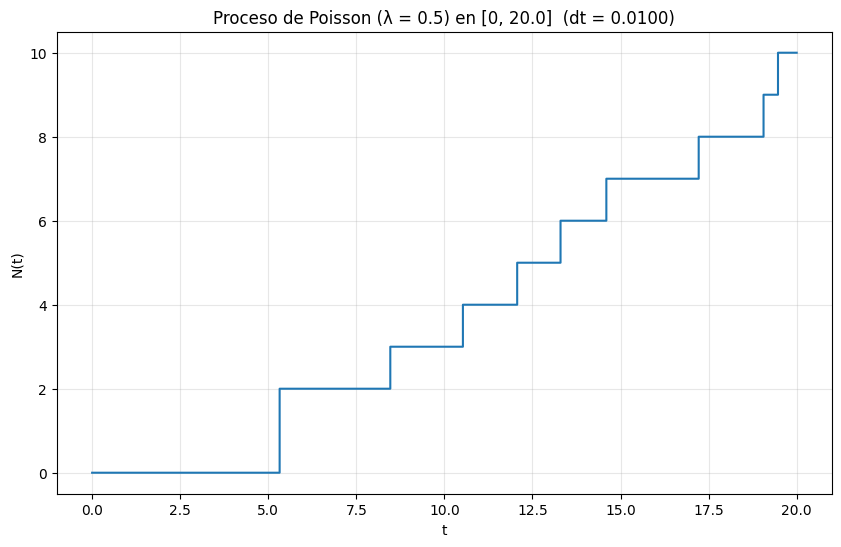


--- Estimación en t = T ---
E[N(20.0)] estimada:  10.0340   | teórica: 10.0000
Var[N(20.0)] estimada: 10.0469   | teórica: 10.0000


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def poisson_process_path(lam: float, T: float, n_steps: int = 2000, seed: int | None = None):
    """
    Simula una trayectoria del Proceso de Poisson N(t) en [0, T] con tasa lam,
    usando incrementos:
        N(t_{k+1}) - N(t_k) ~ Poisson(lam * dt)

    Parameters
    ----------
    lam : float
        Tasa del proceso (lam > 0).
    T : float
        Tiempo final (T > 0).
    n_steps : int
        Número de puntos de la malla (>= 2).
    seed : int | None
        Semilla para reproducibilidad (opcional).

    Returns
    -------
    t : np.ndarray
        Vector de tiempos (longitud n_steps).
    N : np.ndarray
        Valores de N(t) (longitud n_steps), con N(0)=0.
    dt : float
        Paso de tiempo.
    """
    if lam <= 0:
        raise ValueError("lam debe ser > 0")
    if T <= 0:
        raise ValueError("T debe ser > 0")
    if n_steps < 2:
        raise ValueError("n_steps debe ser >= 2")

    if seed is not None:
        np.random.seed(seed)

    t = np.linspace(0.0, T, n_steps)
    dt = t[1] - t[0]

    # Incrementos correctos: Poisson(lam * dt)
    increments = np.random.poisson(lam * dt, size=n_steps - 1)

    # N(0)=0 y acumulación
    N = np.empty(n_steps, dtype=int)
    N[0] = 0
    N[1:] = np.cumsum(increments)

    return t, N, dt


def estimate_mean_var_NT(lam: float, T: float, n_rep: int = 1000, seed: int | None = None):
    """
    Estima E[N(T)] y Var[N(T)] por Monte Carlo.
    Teóricamente: N(T) ~ Poisson(lam*T) => E=Var=lam*T

    Returns
    -------
    mean_hat, var_hat, mean_theory, var_theory
    """
    if n_rep < 2:
        raise ValueError("n_rep debe ser >= 2")
    if seed is not None:
        np.random.seed(seed)

    # Atajo exacto (más eficiente): N(T) ~ Poisson(lam*T)
    samples = np.random.poisson(lam * T, size=n_rep)

    mean_hat = float(np.mean(samples))
    var_hat = float(np.var(samples, ddof=1))  # varianza muestral (insesgada)
    mean_theory = lam * T
    var_theory = lam * T

    return mean_hat, var_hat, mean_theory, var_theory


def main():
    lam = 0.5
    T = 20.0

    # (a) Trayectoria
    t, N, dt = poisson_process_path(lam, T, n_steps=2000, seed=42)

    plt.figure(figsize=(10, 6))
    plt.step(t, N, where="post")
    plt.title(f"Proceso de Poisson (λ = {lam}) en [0, {T}]  (dt = {dt:.4f})")
    plt.xlabel("t")
    plt.ylabel("N(t)")
    plt.grid(alpha=0.3)
    plt.show()

    # (b) Estimar E[N(T)] y Var[N(T)] con 1000 realizaciones
    mean_hat, var_hat, mean_theory, var_theory = estimate_mean_var_NT(lam, T, n_rep=1000, seed=123)

    print("\n--- Estimación en t = T ---")
    print(f"E[N({T})] estimada:  {mean_hat:.4f}   | teórica: {mean_theory:.4f}")
    print(f"Var[N({T})] estimada: {var_hat:.4f}   | teórica: {var_theory:.4f}")


if __name__ == "__main__":
    main()
